In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("tri.log")
df.head()
df["recall"] = -np.log10(1 - df["recall"])

In [11]:
df_hnsw = df[df["tri_ef"]==0]
df_tri = df[df["tri_ef"]!=0]
df["method"] = df["tri_ef"].apply(lambda x: "tri" if x !=0 else "hnsw")

/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

<Axes: xlabel='recall', ylabel='time'>

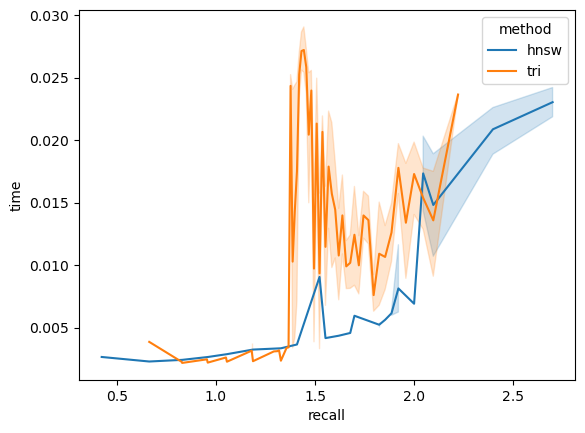

In [12]:
sns.lineplot(df, x="recall", y="time", hue="method")

In [13]:
df2 = df.copy()
df2["diff"] = df2["ef"] - df2["tri_ef"]
df2 = df2[np.logical_or(df2["diff"] <= 1, df2["tri_ef"]==0)]
for i, row in df2.iterrows():
    if row["tri_ef"] == 0:
        df2.loc[i, "method"] = "hnsw"
    elif row["diff"] == 1:
        df2.loc[i, "method"] = "tri@1"
    elif row["diff"] == 2:
        df2.loc[i, "method"] = "tri@2"
    elif row["diff"] == 3:
        df2.loc[i, "method"] = "tri@3"
    else:
        df2.loc[i, "method"] =  None

In [14]:
# lowerbound_recall = query(ef == tri_ef and tri_ef == 0).recall

for i, row in df2.iterrows():
    if row["tri_ef"] == 0:
        df2.loc[i, "lowerbound_recall"] = row["recall"]
    else:
        result = df2.query(f"tri_ef == 0 and ef == {row['tri_ef']}")
        if len(result) == 0:
            pass
        else:
            df2.loc[i, "lowerbound_recall"] = result["recall"].values[0]

# 全打印
# df2.to_csv("tri.log2", index=False)
pd.set_option('display.max_rows', None)
df2

,ef,tri_ef,time,min_time,recall,method,diff,lowerbound_recall
0,1,0,0.002656,0.001961,0.423659,hnsw,1,0.423659
1,2,1,0.003864,0.001939,0.663540,tri@1,1,0.423659
2,2,0,0.002293,0.002159,0.663540,hnsw,2,0.663540
3,3,2,0.002271,0.002187,0.826814,tri@1,1,0.663540
5,3,0,0.002424,0.002345,0.829738,hnsw,3,0.829738
6,4,3,0.002474,0.002342,0.954677,tri@1,1,0.829738
9,4,0,0.002653,0.002608,0.958607,hnsw,4,0.958607
10,5,4,0.002617,0.002553,1.050610,tri@1,1,0.958607
14,5,0,0.002880,0.002810,1.055517,hnsw,5,1.055517
15,6,5,0.004026,0.002795,1.180456,tri@1,1,1.055517


In [15]:
df2 = df2[df2["lowerbound_recall"] <= df2["recall"]]
df2 = df2[df2["recall"] < 1.5]


/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

<Axes: xlabel='recall', ylabel='min_time'>

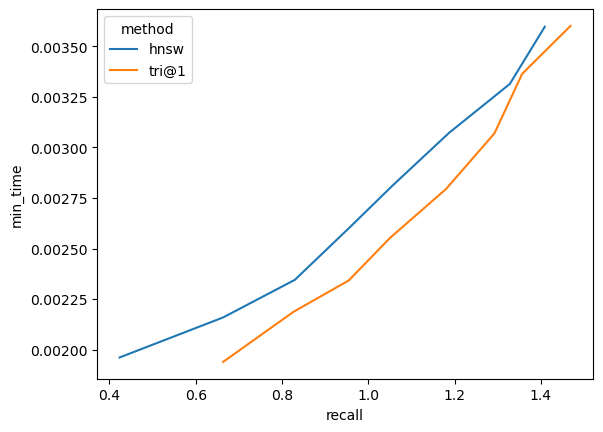

In [16]:
sns.lineplot(df2, x="recall", y="min_time", hue="method")